In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# testing push and pull


In [2]:
DF = pd.read_csv("dataset_world_happiness.csv")
DF

,Country,Region,Happiness Rank,Happiness Score,GDP Per Capita,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
754,NaN,Rwanda,152,3.334,0.35900,NaN,0.61400,0.55500,0.41100,0.21700,NaN,2019
755,NaN,Tanzania,153,3.231,0.47600,NaN,0.49900,0.41700,0.14700,0.27600,NaN,2019
756,NaN,Afghanistan,154,3.203,0.35000,NaN,0.36100,0.00000,0.02500,0.15800,NaN,2019
757,NaN,Central African Republic,155,3.083,0.02600,NaN,0.10500,0.22500,0.03500,0.23500,NaN,2019


In [3]:

### cleaning data set

#*********** Cleaning Country Column ***********#
mask = DF.Country.isnull()                       # Gets index of where "Country" is null == mask
DF.loc[mask, 'Country'] = DF.loc[mask,'Region']  # Inserts the value in "Region" at the same index into "Country"   

idx = DF.Country == DF.Region   # Finds index of where "Region" == "Country"
DF.loc[idx,'Region'] = np.nan   # Replaces "Region" with NaN


#************ Cleaning Region Column *************#
for i in range(len(DF['Region'])):
    
    if pd.isnull(DF.loc[i,'Region']):   # Locating cell of Null values for Region 
        country = DF.loc[i,'Country']   # stores Country of postion i 
        
        for x in range(len(DF['Country'])):
            # going through DF['Country'] until we find 'country' value and if Region is not null 
            if DF.loc[x,'Country'] == country and pd.notnull(DF.loc[x,'Region']):
                DF.loc[i,'Region'] = DF.loc[x,'Region']  # Storing Region value from postion x into position i
                break     # Breaking out of loop / ASK TA
                
indexNullRegion = DF[DF['Region'].isnull()].index.to_numpy()
NullRegion_values = ['Southeastern Asia','Eastern Asia','Sub-Saharan Africa','Latin America and Caribbean',
                    'Middle East and Northern Africa','Sub-Saharan Africa','Latin America and Caribbean',
                    'Middle East and Northern Africa','Central and Eastern Europe','Middle East and Northern Africa',
                    'Sub-Saharan Africa']
counter=0;
for i in indexNullRegion:
    if counter< 11:
        DF.loc[i,'Region'] = NullRegion_values[counter]
        counter+=1
        
#************ Cleaning Family Column ************# 

# mean for close values ; median for outliers 

RegionGrouped = DF.groupby('Region')['Family'].mean() 
# m = DF.groupby('Region')['Family'].median()
indexNullFamily = DF[DF['Family'].isnull()].index.to_numpy()

for i in indexNullFamily:
    DF.loc[i,'Family'] = RegionGrouped[DF.loc[i,'Region']]
    
#*********** Cleaning Dystopia Residual ********#

indexNullDR = DF[DF['Dystopia Residual'].isnull()].index.to_numpy()
DRmean = DF['Dystopia Residual'].mean() 
DF.loc[indexNullDR,'Dystopia Residual'] = DRmean 

#***********Trust (Government Corruption)*******#
Trustmean = DF["Trust (Government Corruption)"].mean()
indexNullTrust = DF[DF['Trust (Government Corruption)'].isnull()].index.to_numpy()
DF.loc[indexNullTrust,'Trust (Government Corruption)'] = Trustmean 

# #*************Droping********************8#
# DF=DF.drop(columns =['Dystopia Residual','Country','Year'])




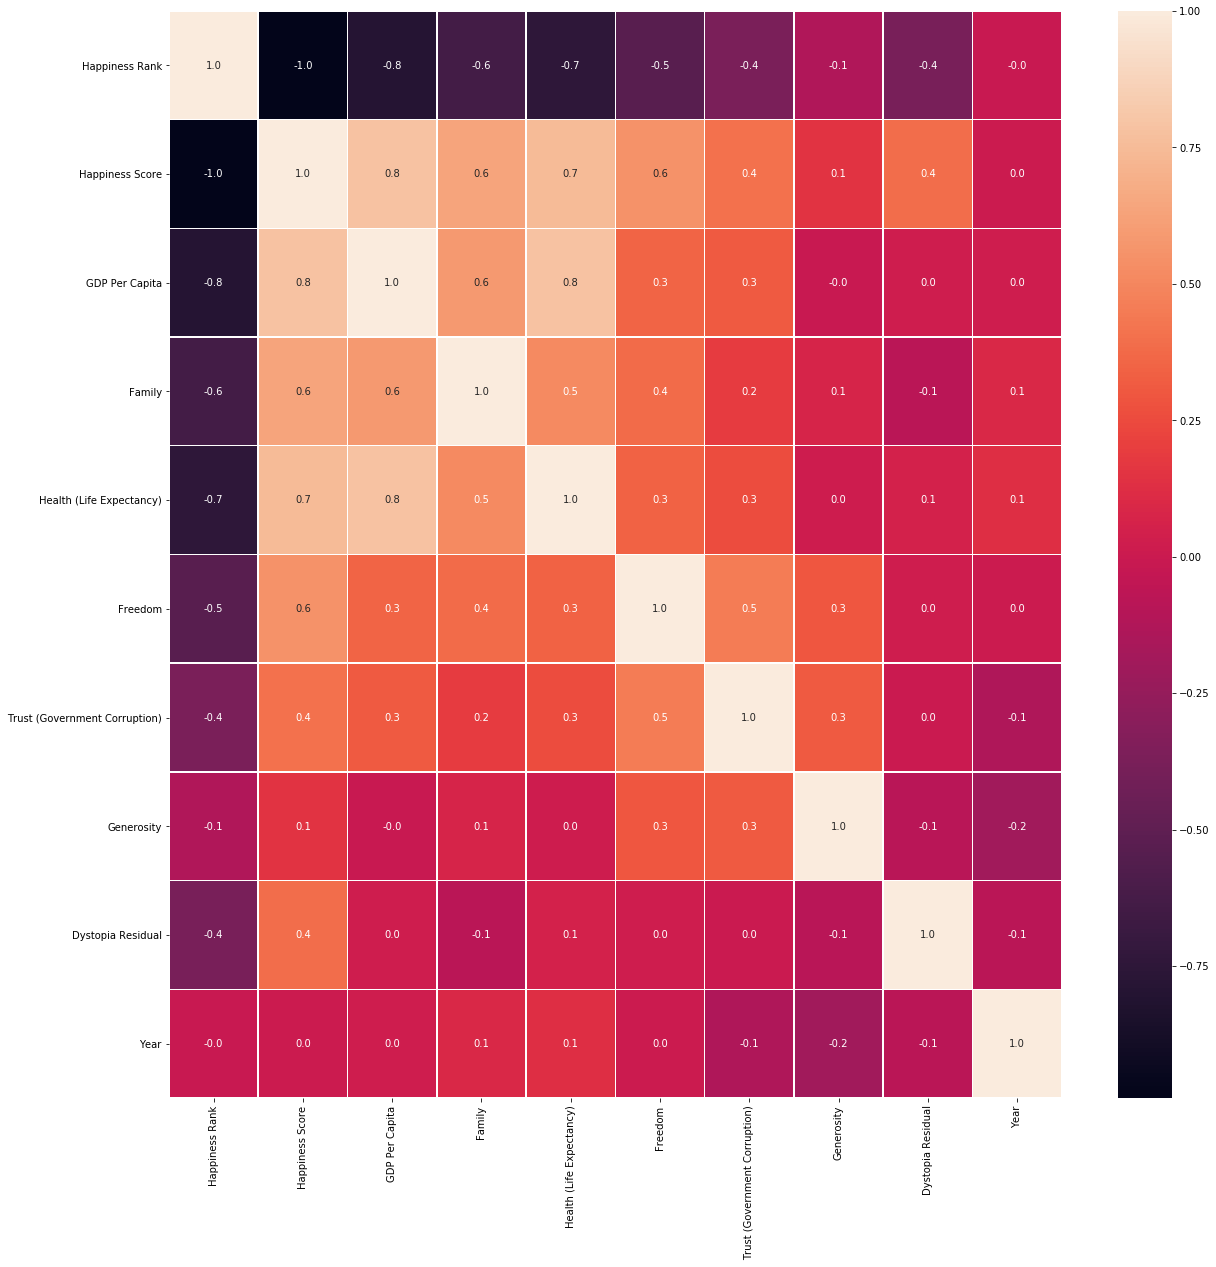

In [4]:
corr=DF.corr()
corr
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

In [5]:
# Finding Corelations 


In [6]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold,cross_val_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

X = pd.get_dummies(DF[[ 'Region', 'Happiness Rank',
       'GDP Per Capita', 'Family','Freedom',
       'Trust (Government Corruption)', 'Generosity',]]).to_numpy()

Y = np.array(DF['Happiness Score'])



In [7]:
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression as LR 
#from sklearn.linear_model import LogisticRegression as LogR
from sklearn.metrics import accuracy_score

(array([11., 24., 11., 19., 18.,  4.,  7.,  0.,  3.,  3.]),
 array([0.00734508, 0.00824696, 0.00914884, 0.01005072, 0.0109526 ,
        0.01185447, 0.01275635, 0.01365823, 0.01456011, 0.01546199,
        0.01636386]),
 <a list of 10 Patch objects>)

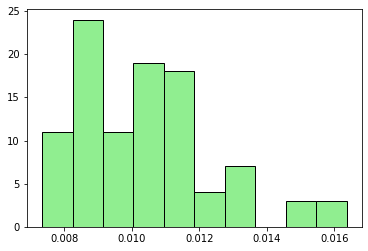

In [8]:

def train_test(X,Y,method):
    mse=[]
    for i in range(100):
        xtrain,xtest,ytrain,ytest=train_test_split(X,Y)
        method.fit(xtrain,ytrain)
        YP=method.predict(xtest)
        mse.append(mean_squared_error(ytest,YP))
    return mse
SVRmethod =SVR()
mse = train_test(X,Y,SVRmethod)
plt.hist(mse,edgecolor="black",color="lightgreen")

(array([ 4., 11., 13., 17.,  9., 16., 12.,  8.,  7.,  3.]),
 array([0.01212224, 0.01328219, 0.01444215, 0.0156021 , 0.01676205,
        0.01792201, 0.01908196, 0.02024192, 0.02140187, 0.02256182,
        0.02372178]),
 <a list of 10 Patch objects>)

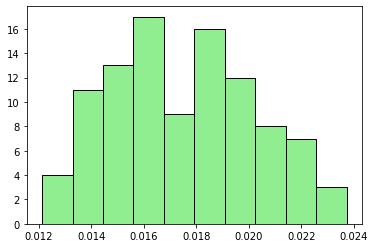

In [9]:
mse = train_test(X,Y,LR())
plt.hist(mse,edgecolor="black",color="lightgreen")

(array([ 5.,  7.,  7., 18., 25., 19., 12.,  6.,  0.,  1.]),
 array([0.0289832 , 0.0305978 , 0.03221241, 0.03382701, 0.03544162,
        0.03705622, 0.03867082, 0.04028543, 0.04190003, 0.04351464,
        0.04512924]),
 <a list of 10 Patch objects>)

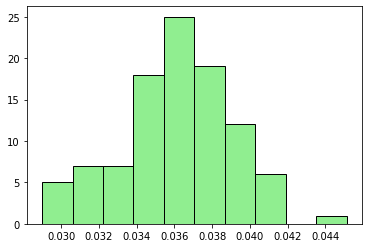

In [10]:
from sklearn.tree import DecisionTreeRegressor

mse = train_test(X,Y,DecisionTreeRegressor(max_depth=3))
plt.hist(mse,edgecolor="black",color="lightgreen")

In [11]:
from sklearn.metrics import confusion_matrix
method = SVR()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)
method.fit(xtrain,ytrain)
YP=method.predict(xtest)


In [12]:
DF2019 = DF[DF['Year']==2019]
DF2018 =  DF[DF['Year']==2018]
DF2017 =  DF[DF['Year']==2017]
DF2016 =  DF[DF['Year']==2016]
DF2015 =  DF[DF['Year']==2015]

In [13]:
# DF2019= DF2019.drop(columns =['Dystopia Residual','Country','Year'])
# DF2019

In [14]:
# Y2019=np.array(DF2019['Happiness Score'])
# X2019=pd.get_dummies(DF2019[['Region','Happiness Rank','GDP Per Capita',
#                        'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]).to_numpy()


In [15]:

# method = SVR()

# mse=[]
# for i in range(50):
#     xtrain,xtest,ytrain,ytest=train_test_split(X2019,Y2019)
#     method.fit(xtrain,ytrain)
#     YP=method.predict(xtest)
#     mse.append(mean_squared_error(ytest,YP))

# plt.hist(mse,edgecolor="black",color="lightgreen")

In [16]:
DF.describe()

,Happiness Rank,Happiness Score,GDP Per Capita,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,78.753623,5.377318,0.916629,0.989978,0.613224,0.409679,0.124838,0.216846,2.092243,2016.996047
std,45.143496,1.126170,0.407404,0.266771,0.248287,0.152673,0.104751,0.120568,0.437919,1.422115
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,39.500000,4.510500,0.604024,0.791847,0.440305,0.309205,0.055000,0.129881,1.972777,2016.000000
50%,79.000000,5.314000,0.982409,1.029120,0.647380,0.431000,0.091066,0.201313,2.092243,2017.000000
75%,118.000000,6.192000,1.237500,1.162655,0.808579,0.530500,0.155150,0.275355,2.201575,2018.000000
max,158.000000,7.769000,2.096000,1.610574,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000


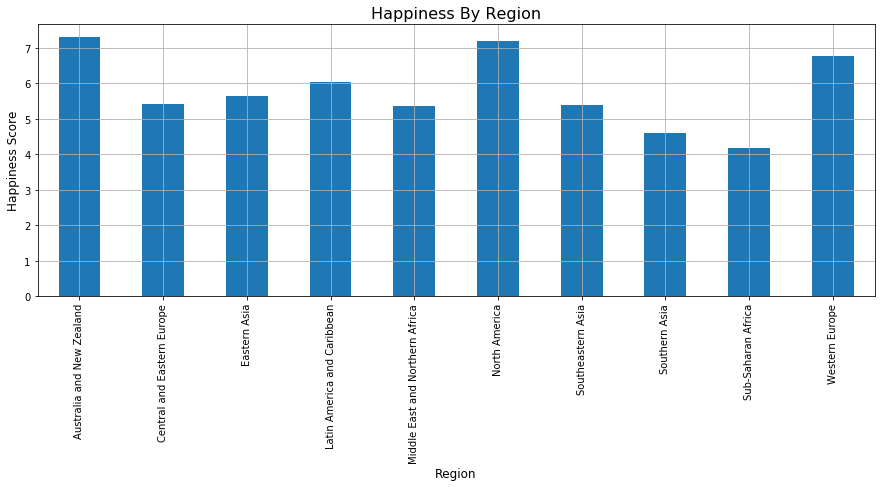

In [17]:
RegionGrouped = DF.groupby('Region')['Happiness Score'].mean()
RegionGrouped.plot.bar()
plt.title("Happiness By Region", fontsize = 16)
plt.ylabel("Happiness Score", fontsize = 12)
plt.xlabel("Region",fontsize = 12)
plt.gcf().set_size_inches(15,5)
plt.grid();


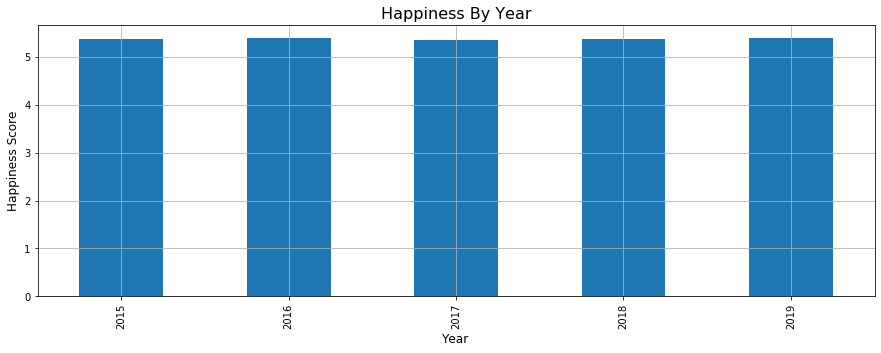

In [18]:
YearGrouped = DF.groupby('Year')['Happiness Score'].mean()
YearGrouped.plot.bar()
plt.title("Happiness By Year", fontsize = 16)
plt.ylabel("Happiness Score", fontsize = 12)
plt.xlabel("Year",fontsize = 12)
plt.gcf().set_size_inches(15,5)
plt.grid();